### **Objective** ###

Project Objective:
- Load, clean, and explore multiple app-related datasets to analyze user behavior, app performance and monetization trends.
- Generate actionable insights to support data-driven decisions for improving user growth, engagement and revenue.



### **Import libraries** ###

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
import sqlite3
import warnings
warnings.filterwarnings('ignore')

### **Database connection** ###

In [3]:
admob_df = pd.read_csv('Admob.csv', encoding='utf-16', sep='\t')
all_user_lost_df = pd.read_csv('All User lost.csv', encoding='latin1')
crash_df = pd.read_csv('Crash.csv', encoding='latin1')
dau_df = pd.read_csv('DAU.csv', encoding='latin1')
new_user_df = pd.read_csv('new user.csv', encoding='latin1')
rating_df = pd.read_csv('Rating.csv', encoding='latin1')


### **Data Exploration and Data Cleaning** ###

In [4]:
admob_df

,Date,Active users (AU),Ad viewers (AV),Ad viewer rate,Overall earnings (USD),Ads earnings (USD),Purchase earnings (includes fees) (USD),Overall ARPU (USD),Ads ARPV (USD),Impressions,Imps / AU,Imps / AV,Sessions / AU,Imps / Session,Rewarded users,Rewarded users (%),Rewarded events,Rewarded earnings / Rewarded users (USD),Rewarded impressions / Rewarded users,Rewarded events (%)
0,18-05-2025,565,2,0.35%,0.01,0.01,0,0.00002,0.00672,29,0.05,14.50,2.74,0.02,NaN,NaN,NaN,NaN,NaN,NaN
1,19-05-2025,528,2,0.38%,0.00,0.00,0,0.00000,0.00000,0,0.00,0.00,1.65,0.00,NaN,NaN,NaN,NaN,NaN,NaN
2,20-05-2025,568,73,12.85%,0.22,0.22,0,0.00039,0.00302,544,0.96,7.45,2.79,0.34,NaN,NaN,NaN,NaN,NaN,NaN
3,21-05-2025,520,110,21.15%,0.40,0.40,0,0.00076,0.00359,717,1.38,6.52,2.83,0.49,NaN,NaN,NaN,NaN,NaN,NaN
4,22-05-2025,524,166,31.68%,0.40,0.40,0,0.00076,0.00240,1274,2.43,7.67,1.86,1.30,NaN,NaN,NaN,NaN,NaN,NaN
5,23-05-2025,571,178,31.17%,0.35,0.35,0,0.00061,0.00197,1023,1.79,5.75,1.67,1.07,NaN,NaN,NaN,NaN,NaN,NaN
6,24-05-2025,564,194,34.40%,0.14,0.14,0,0.00024,0.00070,902,1.60,4.65,1.66,0.96,NaN,NaN,NaN,NaN,NaN,NaN
7,25-05-2025,584,212,36.30%,0.26,0.26,0,0.00045,0.00124,1306,2.24,6.16,1.74,1.28,NaN,NaN,NaN,NaN,NaN,NaN
8,26-05-2025,536,242,45.15%,0.25,0.25,0,0.00047,0.00105,1389,2.59,5.74,1.68,1.54,NaN,NaN,NaN,NaN,NaN,NaN
9,27-05-2025,548,280,51.09%,0.37,0.37,0,0.00067,0.00132,1677,3.06,5.99,1.64,1.86,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
all_user_lost_df

,Date,"User loss (All users, All events, Per interval, Daily): All countries / regions","User loss (All users, All events, Per interval, Daily): India","User loss (All users, All events, Per interval, Daily): Pakistan","User loss (All users, All events, Per interval, Daily): Bangladesh",Notes
0,"Dec 1, 2024",3,2,0,1,NaN
1,"Dec 2, 2024",7,5,0,0,NaN
2,"Dec 3, 2024",3,2,0,1,NaN
3,"Dec 4, 2024",6,3,0,0,NaN
4,"Dec 5, 2024",9,5,0,1,NaN
...,...,...,...,...,...,...
207,"Jun 26, 2025",51,44,2,2,NaN
208,"Jun 27, 2025",62,50,2,3,NaN
209,"Jun 28, 2025",58,50,1,1,NaN
210,"Jun 29, 2025",57,50,1,1,Rollout of release: Started rollout of 18 (5.0...


In [6]:
crash_df 

,Date,"Crashes (Per interval, Daily): All Android versions","Crashes (Per interval, Daily): Android 15","Crashes (Per interval, Daily): Android 14","Crashes (Per interval, Daily): Android 13","Crashes (Per interval, Daily): Android 12",Notes
0,"Dec 1, 2024",0,0,0,0,0,NaN
1,"Dec 2, 2024",0,0,0,0,0,NaN
2,"Dec 3, 2024",0,0,0,0,0,NaN
3,"Dec 4, 2024",0,0,0,0,0,NaN
4,"Dec 5, 2024",0,0,0,0,0,NaN
...,...,...,...,...,...,...,...
207,"Jun 26, 2025",93,42,22,14,10,NaN
208,"Jun 27, 2025",75,25,26,12,4,NaN
209,"Jun 28, 2025",91,33,22,13,10,NaN
210,"Jun 29, 2025",59,21,14,15,1,Rollout of release: Started rollout of 18 (5.0...


In [7]:
dau_df

,Date,"Daily Active Users (DAU) (Unique users, Per interval, Daily): All countries / regions","Daily Active Users (DAU) (Unique users, Per interval, Daily): India","Daily Active Users (DAU) (Unique users, Per interval, Daily): Pakistan","Daily Active Users (DAU) (Unique users, Per interval, Daily): Bangladesh",Notes
0,"Dec 1, 2024",-,-,-,-,NaN
1,"Dec 2, 2024",-,-,-,-,NaN
2,"Dec 3, 2024",-,-,-,-,NaN
3,"Dec 4, 2024",-,-,-,-,Change in reporting data: Users who interacted...
4,"Dec 5, 2024",-,-,-,-,NaN
...,...,...,...,...,...,...
207,"Jun 26, 2025",686,604,15,9,NaN
208,"Jun 27, 2025",652,584,21,9,NaN
209,"Jun 28, 2025",736,672,17,9,NaN
210,"Jun 29, 2025",706,618,17,11,Rollout of release: Started rollout of 18 (5.0...


In [8]:
new_user_df

,Date,"User acquisition (New users, All events, Per interval, Daily): All countries / regions","User acquisition (New users, All events, Per interval, Daily): India","User acquisition (New users, All events, Per interval, Daily): Pakistan","User acquisition (New users, All events, Per interval, Daily): Bangladesh",Notes
0,"Dec 1, 2024",6,6,0,0,NaN
1,"Dec 2, 2024",4,4,0,0,NaN
2,"Dec 3, 2024",15,12,0,1,NaN
3,"Dec 4, 2024",13,13,0,0,NaN
4,"Dec 5, 2024",11,9,0,1,NaN
...,...,...,...,...,...,...
207,"Jun 26, 2025",79,63,4,2,NaN
208,"Jun 27, 2025",59,50,3,3,NaN
209,"Jun 28, 2025",68,56,1,4,NaN
210,"Jun 29, 2025",70,64,2,1,Rollout of release: Started rollout of 18 (5.0...


In [9]:
rating_df

,Date,"Google Play rating (Per interval, Daily): All countries / regions","Google Play rating (Per interval, Daily): India","Google Play rating (Per interval, Daily): Pakistan","Google Play rating (Per interval, Daily): Bangladesh",Notes
0,"Dec 1, 2024",-,-,-,-,NaN
1,"Dec 2, 2024",-,-,-,-,NaN
2,"Dec 3, 2024",-,-,-,-,NaN
3,"Dec 4, 2024",-,-,-,-,NaN
4,"Dec 5, 2024",-,-,-,-,NaN
...,...,...,...,...,...,...
207,"Jun 26, 2025",4.38,4.41,4.38,4.38,NaN
208,"Jun 27, 2025",4.34,4.36,4.34,4.34,NaN
209,"Jun 28, 2025",4.36,4.36,4.34,4.34,NaN
210,"Jun 29, 2025",4.36,4.36,4.34,4.34,Rollout of release: Started rollout of 18 (5.0...


In [10]:
for df, name in [(admob_df, 'Admob'), (all_user_lost_df, 'User Loss'), 
                 (crash_df, 'Crash'), (dau_df, 'DAU'), 
                 (new_user_df, 'New User'), (rating_df, 'Rating')]:
    print(f"{name}: {df.shape}")
    print(df.columns)


Admob: (44, 20)
Index(['Date', 'Active users (AU)', 'Ad viewers (AV)', 'Ad viewer rate',
       'Overall earnings (USD)', 'Ads earnings (USD)',
       'Purchase earnings (includes fees) (USD)', 'Overall ARPU (USD)',
       'Ads ARPV (USD)', 'Impressions', 'Imps / AU', 'Imps / AV',
       'Sessions / AU', 'Imps / Session', 'Rewarded users',
       'Rewarded users (%)', 'Rewarded events',
       'Rewarded earnings / Rewarded users (USD)',
       'Rewarded impressions / Rewarded users', 'Rewarded events (%)'],
      dtype='object')
User Loss: (212, 6)
Index(['Date',
       'User loss (All users, All events, Per interval, Daily): All countries / regions',
       'User loss (All users, All events, Per interval, Daily): India',
       'User loss (All users, All events, Per interval, Daily): Pakistan',
       'User loss (All users, All events, Per interval, Daily): Bangladesh',
       'Notes'],
      dtype='object')
Crash: (212, 7)
Index(['Date', 'Crashes (Per interval, Daily): All Android ve

In [11]:
print("Admob Data")
admob_df.info()
print(admob_df.isnull().sum())

Admob Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      44 non-null     object 
 1   Active users (AU)                         44 non-null     int64  
 2   Ad viewers (AV)                           44 non-null     int64  
 3   Ad viewer rate                            44 non-null     object 
 4   Overall earnings (USD)                    44 non-null     float64
 5   Ads earnings (USD)                        44 non-null     float64
 6   Purchase earnings (includes fees) (USD)   44 non-null     int64  
 7   Overall ARPU (USD)                        44 non-null     float64
 8   Ads ARPV (USD)                            44 non-null     float64
 9   Impressions                               44 non-null     int64  
 10  Imps / AU                    

In [12]:
print("All user lost Data")
all_user_lost_df.info()
print(all_user_lost_df.isnull().sum())

All user lost Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 6 columns):
 #   Column                                                                           Non-Null Count  Dtype 
---  ------                                                                           --------------  ----- 
 0   Date                                                                             212 non-null    object
 1   User loss (All users, All events, Per interval, Daily): All countries / regions  212 non-null    int64 
 2   User loss (All users, All events, Per interval, Daily): India                    212 non-null    int64 
 3   User loss (All users, All events, Per interval, Daily): Pakistan                 212 non-null    int64 
 4   User loss (All users, All events, Per interval, Daily): Bangladesh               212 non-null    int64 
 5   Notes                                                                            12 non-null     object
dtype

In [13]:
print("Crash Data")
crash_df.info()
print(crash_df.isnull().sum())

Crash Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Date                                                 212 non-null    object
 1   Crashes (Per interval, Daily): All Android versions  212 non-null    int64 
 2   Crashes (Per interval, Daily): Android 15            212 non-null    int64 
 3   Crashes (Per interval, Daily): Android 14            212 non-null    int64 
 4   Crashes (Per interval, Daily): Android 13            212 non-null    int64 
 5   Crashes (Per interval, Daily): Android 12            212 non-null    int64 
 6   Notes                                                12 non-null     object
dtypes: int64(5), object(2)
memory usage: 11.7+ KB
Date                                                     0
Crashes (Per interval, Daily): All Android ver

In [14]:
print("DAU Data")
dau_df.info()
print(dau_df.isnull().sum())

DAU Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 6 columns):
 #   Column                                                                                 Non-Null Count  Dtype 
---  ------                                                                                 --------------  ----- 
 0   Date                                                                                   212 non-null    object
 1   Daily Active Users (DAU) (Unique users, Per interval, Daily): All countries / regions  212 non-null    object
 2   Daily Active Users (DAU) (Unique users, Per interval, Daily): India                    212 non-null    object
 3   Daily Active Users (DAU) (Unique users, Per interval, Daily): Pakistan                 212 non-null    object
 4   Daily Active Users (DAU) (Unique users, Per interval, Daily): Bangladesh               212 non-null    object
 5   Notes                                                                        

In [15]:
print("New User Data")
new_user_df.info()
print(new_user_df.isnull().sum()) 

New User Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 6 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   Date                                                                                    212 non-null    object
 1   User acquisition (New users, All events, Per interval, Daily): All countries / regions  212 non-null    int64 
 2   User acquisition (New users, All events, Per interval, Daily): India                    212 non-null    int64 
 3   User acquisition (New users, All events, Per interval, Daily): Pakistan                 212 non-null    int64 
 4   User acquisition (New users, All events, Per interval, Daily): Bangladesh               212 non-null    int64 
 5   Notes                                                            

In [16]:
print("Rating Data")
rating_df.info()
print(rating_df.isnull().sum())

Rating Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 6 columns):
 #   Column                                                             Non-Null Count  Dtype 
---  ------                                                             --------------  ----- 
 0   Date                                                               212 non-null    object
 1   Google Play rating (Per interval, Daily): All countries / regions  212 non-null    object
 2   Google Play rating (Per interval, Daily): India                    212 non-null    object
 3   Google Play rating (Per interval, Daily): Pakistan                 212 non-null    object
 4   Google Play rating (Per interval, Daily): Bangladesh               212 non-null    object
 5   Notes                                                              12 non-null     object
dtypes: object(6)
memory usage: 10.1+ KB
Date                                                                   0
Google Pla

In [17]:
admob_df.drop(['Notes','Rewarded users','Rewarded users (%)','Rewarded events','Rewarded earnings / Rewarded users (USD)','Rewarded impressions / Rewarded users','Rewarded events (%)'], axis=1, inplace=True, errors='ignore')


In [18]:
admob_df['Date'] = pd.to_datetime(admob_df['Date'])
admob_df = admob_df.sort_values('Date') 
print("Admob Data")
admob_df.info()
admob_df

Admob Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Date                                     44 non-null     datetime64[ns]
 1   Active users (AU)                        44 non-null     int64         
 2   Ad viewers (AV)                          44 non-null     int64         
 3   Ad viewer rate                           44 non-null     object        
 4   Overall earnings (USD)                   44 non-null     float64       
 5   Ads earnings (USD)                       44 non-null     float64       
 6   Purchase earnings (includes fees) (USD)  44 non-null     int64         
 7   Overall ARPU (USD)                       44 non-null     float64       
 8   Ads ARPV (USD)                           44 non-null     float64       
 9   Impressions                       

,Date,Active users (AU),Ad viewers (AV),Ad viewer rate,Overall earnings (USD),Ads earnings (USD),Purchase earnings (includes fees) (USD),Overall ARPU (USD),Ads ARPV (USD),Impressions,Imps / AU,Imps / AV,Sessions / AU,Imps / Session
0,2025-05-18,565,2,0.35%,0.01,0.01,0,0.00002,0.00672,29,0.05,14.50,2.74,0.02
1,2025-05-19,528,2,0.38%,0.00,0.00,0,0.00000,0.00000,0,0.00,0.00,1.65,0.00
2,2025-05-20,568,73,12.85%,0.22,0.22,0,0.00039,0.00302,544,0.96,7.45,2.79,0.34
3,2025-05-21,520,110,21.15%,0.40,0.40,0,0.00076,0.00359,717,1.38,6.52,2.83,0.49
4,2025-05-22,524,166,31.68%,0.40,0.40,0,0.00076,0.00240,1274,2.43,7.67,1.86,1.30
5,2025-05-23,571,178,31.17%,0.35,0.35,0,0.00061,0.00197,1023,1.79,5.75,1.67,1.07
6,2025-05-24,564,194,34.40%,0.14,0.14,0,0.00024,0.00070,902,1.60,4.65,1.66,0.96
7,2025-05-25,584,212,36.30%,0.26,0.26,0,0.00045,0.00124,1306,2.24,6.16,1.74,1.28
8,2025-05-26,536,242,45.15%,0.25,0.25,0,0.00047,0.00105,1389,2.59,5.74,1.68,1.54
9,2025-05-27,548,280,51.09%,0.37,0.37,0,0.00067,0.00132,1677,3.06,5.99,1.64,1.86


In [19]:
all_user_lost_df.drop(['Notes'], axis=1, inplace=True, errors='ignore')


In [20]:
all_user_lost_df['Date'] = pd.to_datetime(all_user_lost_df['Date'])
all_user_lost_df = all_user_lost_df.sort_values('Date') 
print("All User Lost Data")
all_user_lost_df.info()
all_user_lost_df

All User Lost Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 5 columns):
 #   Column                                                                           Non-Null Count  Dtype         
---  ------                                                                           --------------  -----         
 0   Date                                                                             212 non-null    datetime64[ns]
 1   User loss (All users, All events, Per interval, Daily): All countries / regions  212 non-null    int64         
 2   User loss (All users, All events, Per interval, Daily): India                    212 non-null    int64         
 3   User loss (All users, All events, Per interval, Daily): Pakistan                 212 non-null    int64         
 4   User loss (All users, All events, Per interval, Daily): Bangladesh               212 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 8.4 KB


,Date,"User loss (All users, All events, Per interval, Daily): All countries / regions","User loss (All users, All events, Per interval, Daily): India","User loss (All users, All events, Per interval, Daily): Pakistan","User loss (All users, All events, Per interval, Daily): Bangladesh"
0,2024-12-01,3,2,0,1
1,2024-12-02,7,5,0,0
2,2024-12-03,3,2,0,1
3,2024-12-04,6,3,0,0
4,2024-12-05,9,5,0,1
...,...,...,...,...,...
207,2025-06-26,51,44,2,2
208,2025-06-27,62,50,2,3
209,2025-06-28,58,50,1,1
210,2025-06-29,57,50,1,1


In [21]:
crash_df.drop(['Notes'], axis=1, inplace=True, errors='ignore')


In [22]:
crash_df['Date'] = pd.to_datetime(crash_df['Date'])
crash_df = crash_df.sort_values('Date') 
print("Crash Data")
crash_df.info()
crash_df 

Crash Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 6 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   Date                                                 212 non-null    datetime64[ns]
 1   Crashes (Per interval, Daily): All Android versions  212 non-null    int64         
 2   Crashes (Per interval, Daily): Android 15            212 non-null    int64         
 3   Crashes (Per interval, Daily): Android 14            212 non-null    int64         
 4   Crashes (Per interval, Daily): Android 13            212 non-null    int64         
 5   Crashes (Per interval, Daily): Android 12            212 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 10.1 KB


,Date,"Crashes (Per interval, Daily): All Android versions","Crashes (Per interval, Daily): Android 15","Crashes (Per interval, Daily): Android 14","Crashes (Per interval, Daily): Android 13","Crashes (Per interval, Daily): Android 12"
0,2024-12-01,0,0,0,0,0
1,2024-12-02,0,0,0,0,0
2,2024-12-03,0,0,0,0,0
3,2024-12-04,0,0,0,0,0
4,2024-12-05,0,0,0,0,0
...,...,...,...,...,...,...
207,2025-06-26,93,42,22,14,10
208,2025-06-27,75,25,26,12,4
209,2025-06-28,91,33,22,13,10
210,2025-06-29,59,21,14,15,1


In [23]:
dau_df.drop(['Notes'], axis=1, inplace=True, errors='ignore')

In [24]:
dau_df['Date'] = pd.to_datetime(dau_df['Date'])
dau_df = dau_df.sort_values('Date') 
print("DAU Data")
dau_df.info()
dau_df 

DAU Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 5 columns):
 #   Column                                                                                 Non-Null Count  Dtype         
---  ------                                                                                 --------------  -----         
 0   Date                                                                                   212 non-null    datetime64[ns]
 1   Daily Active Users (DAU) (Unique users, Per interval, Daily): All countries / regions  212 non-null    object        
 2   Daily Active Users (DAU) (Unique users, Per interval, Daily): India                    212 non-null    object        
 3   Daily Active Users (DAU) (Unique users, Per interval, Daily): Pakistan                 212 non-null    object        
 4   Daily Active Users (DAU) (Unique users, Per interval, Daily): Bangladesh               212 non-null    object        
dtypes: datetime64[ns](1),

,Date,"Daily Active Users (DAU) (Unique users, Per interval, Daily): All countries / regions","Daily Active Users (DAU) (Unique users, Per interval, Daily): India","Daily Active Users (DAU) (Unique users, Per interval, Daily): Pakistan","Daily Active Users (DAU) (Unique users, Per interval, Daily): Bangladesh"
0,2024-12-01,-,-,-,-
1,2024-12-02,-,-,-,-
2,2024-12-03,-,-,-,-
3,2024-12-04,-,-,-,-
4,2024-12-05,-,-,-,-
...,...,...,...,...,...
207,2025-06-26,686,604,15,9
208,2025-06-27,652,584,21,9
209,2025-06-28,736,672,17,9
210,2025-06-29,706,618,17,11


In [25]:
new_user_df.drop(['Notes'], axis=1, inplace=True, errors='ignore')

In [26]:
new_user_df['Date'] = pd.to_datetime(new_user_df['Date'])
new_user_df= new_user_df.sort_values('Date') 
print("New User Data")
new_user_df.info()
new_user_df


New User Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 5 columns):
 #   Column                                                                                  Non-Null Count  Dtype         
---  ------                                                                                  --------------  -----         
 0   Date                                                                                    212 non-null    datetime64[ns]
 1   User acquisition (New users, All events, Per interval, Daily): All countries / regions  212 non-null    int64         
 2   User acquisition (New users, All events, Per interval, Daily): India                    212 non-null    int64         
 3   User acquisition (New users, All events, Per interval, Daily): Pakistan                 212 non-null    int64         
 4   User acquisition (New users, All events, Per interval, Daily): Bangladesh               212 non-null    int64         
dtypes: dateti

,Date,"User acquisition (New users, All events, Per interval, Daily): All countries / regions","User acquisition (New users, All events, Per interval, Daily): India","User acquisition (New users, All events, Per interval, Daily): Pakistan","User acquisition (New users, All events, Per interval, Daily): Bangladesh"
0,2024-12-01,6,6,0,0
1,2024-12-02,4,4,0,0
2,2024-12-03,15,12,0,1
3,2024-12-04,13,13,0,0
4,2024-12-05,11,9,0,1
...,...,...,...,...,...
207,2025-06-26,79,63,4,2
208,2025-06-27,59,50,3,3
209,2025-06-28,68,56,1,4
210,2025-06-29,70,64,2,1


In [27]:
rating_df.drop(['Notes'], axis=1, inplace=True, errors='ignore')

In [28]:
rating_df['Date'] = pd.to_datetime(rating_df['Date'])
rating_df= rating_df.sort_values('Date') 
print("Rating Data")
rating_df.info()
rating_df


Rating Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 5 columns):
 #   Column                                                             Non-Null Count  Dtype         
---  ------                                                             --------------  -----         
 0   Date                                                               212 non-null    datetime64[ns]
 1   Google Play rating (Per interval, Daily): All countries / regions  212 non-null    object        
 2   Google Play rating (Per interval, Daily): India                    212 non-null    object        
 3   Google Play rating (Per interval, Daily): Pakistan                 212 non-null    object        
 4   Google Play rating (Per interval, Daily): Bangladesh               212 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 8.4+ KB


,Date,"Google Play rating (Per interval, Daily): All countries / regions","Google Play rating (Per interval, Daily): India","Google Play rating (Per interval, Daily): Pakistan","Google Play rating (Per interval, Daily): Bangladesh"
0,2024-12-01,-,-,-,-
1,2024-12-02,-,-,-,-
2,2024-12-03,-,-,-,-
3,2024-12-04,-,-,-,-
4,2024-12-05,-,-,-,-
...,...,...,...,...,...
207,2025-06-26,4.38,4.41,4.38,4.38
208,2025-06-27,4.34,4.36,4.34,4.34
209,2025-06-28,4.36,4.36,4.34,4.34
210,2025-06-29,4.36,4.36,4.34,4.34


In [29]:
merged_df = dau_df
merged_df = pd.merge(merged_df, all_user_lost_df, on='Date', how='outer')
merged_df = pd.merge(merged_df, crash_df, on='Date', how='outer')
merged_df = pd.merge(merged_df, new_user_df, on='Date', how='outer')
merged_df = pd.merge(merged_df, rating_df, on='Date', how='outer')
merged_df = pd.merge(merged_df, admob_df, on='Date', how='outer')
merged_df = merged_df.sort_values('Date')
merged_df = merged_df.fillna(0)
merged_df.to_csv('merged_metrics.csv', index=False)

print(merged_df)

          Date  \
0   2024-12-01   
1   2024-12-02   
2   2024-12-03   
3   2024-12-04   
4   2024-12-05   
..         ...   
207 2025-06-26   
208 2025-06-27   
209 2025-06-28   
210 2025-06-29   
211 2025-06-30   

    Daily Active Users (DAU) (Unique users, Per interval, Daily): All countries / regions  \
0                                                    -                                      
1                                                    -                                      
2                                                    -                                      
3                                                    -                                      
4                                                    -                                      
..                                                 ...                                      
207                                                686                                      
208                                    

In [30]:
merged_df.describe()

,Date,"User loss (All users, All events, Per interval, Daily): All countries / regions","User loss (All users, All events, Per interval, Daily): India","User loss (All users, All events, Per interval, Daily): Pakistan","User loss (All users, All events, Per interval, Daily): Bangladesh","Crashes (Per interval, Daily): All Android versions","Crashes (Per interval, Daily): Android 15","Crashes (Per interval, Daily): Android 14","Crashes (Per interval, Daily): Android 13","Crashes (Per interval, Daily): Android 12",...,Overall earnings (USD),Ads earnings (USD),Purchase earnings (includes fees) (USD),Overall ARPU (USD),Ads ARPV (USD),Impressions,Imps / AU,Imps / AV,Sessions / AU,Imps / Session
count,212,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.0,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,2025-03-16 12:00:00,37.066038,29.966981,1.415094,1.457547,14.726415,4.641509,4.764151,2.245283,1.051887,...,0.067311,0.067311,0.0,0.000113,0.000271,348.141509,0.581792,1.213915,0.372170,0.334953
min,2024-12-01 00:00:00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2025-01-22 18:00:00,21.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2025-03-16 12:00:00,32.000000,26.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2025-05-08 06:00:00,57.000000,43.250000,2.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2025-06-30 00:00:00,244.000000,231.000000,7.000000,6.000000,106.000000,42.000000,37.000000,26.000000,10.000000,...,0.570000,0.570000,0.0,0.000940,0.006720,2427.000000,3.820000,14.500000,2.830000,2.250000
std,NaN,25.575747,22.127889,1.584091,1.518633,29.706952,9.957910,9.899545,4.832378,2.271218,...,0.142851,0.142851,0.0,0.000240,0.000709,726.118120,1.204518,2.500705,0.739602,0.697373


In [31]:
print(merged_df.columns.tolist())


['Date', 'Daily Active Users (DAU) (Unique users, Per interval, Daily): All countries / regions', 'Daily Active Users (DAU) (Unique users, Per interval, Daily): India', 'Daily Active Users (DAU) (Unique users, Per interval, Daily): Pakistan', 'Daily Active Users (DAU) (Unique users, Per interval, Daily): Bangladesh', 'User loss (All users, All events, Per interval, Daily): All countries / regions', 'User loss (All users, All events, Per interval, Daily): India', 'User loss (All users, All events, Per interval, Daily): Pakistan', 'User loss (All users, All events, Per interval, Daily): Bangladesh', 'Crashes (Per interval, Daily): All Android versions', 'Crashes (Per interval, Daily): Android 15', 'Crashes (Per interval, Daily): Android 14', 'Crashes (Per interval, Daily): Android 13', 'Crashes (Per interval, Daily): Android 12', 'User acquisition (New users, All events, Per interval, Daily): All countries / regions', 'User acquisition (New users, All events, Per interval, Daily): India'

### **Data analysis and Visualization** ###

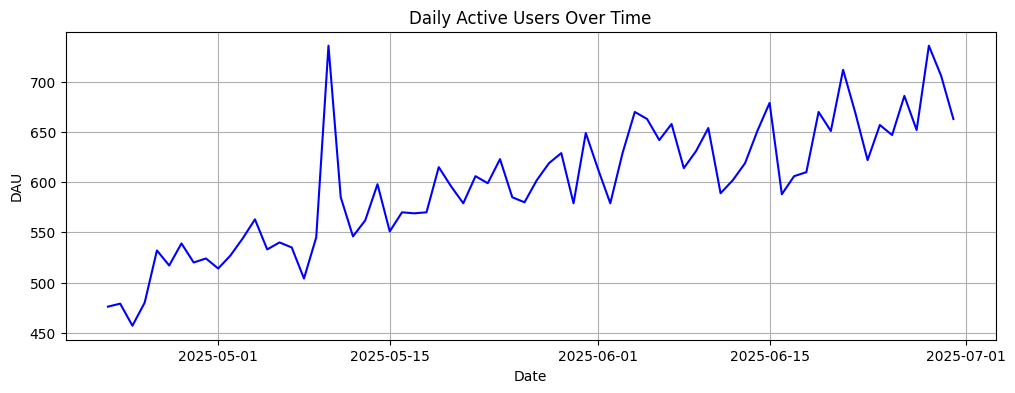

In [32]:
merged_df['Daily Active Users (DAU) (Unique users, Per interval, Daily): All countries / regions'] = pd.to_numeric(
    merged_df['Daily Active Users (DAU) (Unique users, Per interval, Daily): All countries / regions'],
    errors='coerce'
)

plot_df = merged_df.dropna(subset=['Daily Active Users (DAU) (Unique users, Per interval, Daily): All countries / regions'])

plt.figure(figsize=(12,4))
plt.plot(
    plot_df['Date'],
    plot_df['Daily Active Users (DAU) (Unique users, Per interval, Daily): All countries / regions'],
    color='blue'
)
plt.title("Daily Active Users Over Time")
plt.xlabel("Date")
plt.ylabel("DAU")
plt.grid(True)
plt.show()



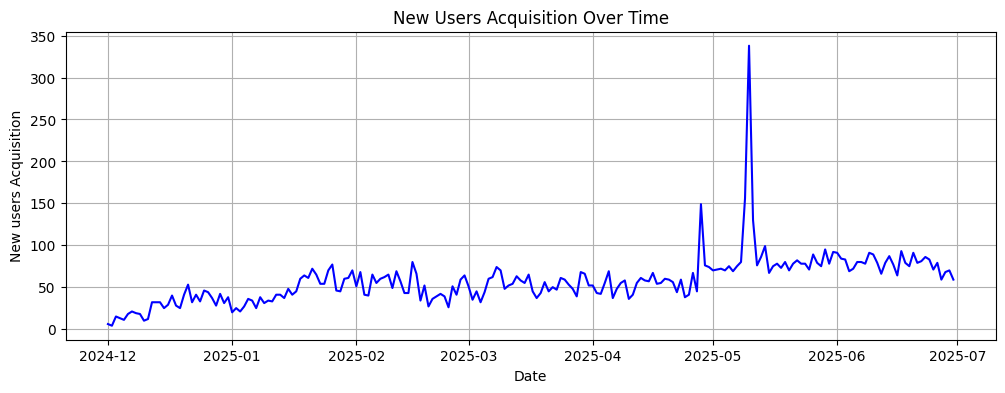

In [33]:
plt.figure(figsize=(12,4))
plt.plot(merged_df['Date'], merged_df['User acquisition (New users, All events, Per interval, Daily): All countries / regions'], color='blue')
plt.title("New Users Acquisition Over Time")
plt.xlabel("Date")
plt.ylabel("New users Acquisition")
plt.grid(True)
plt.show()


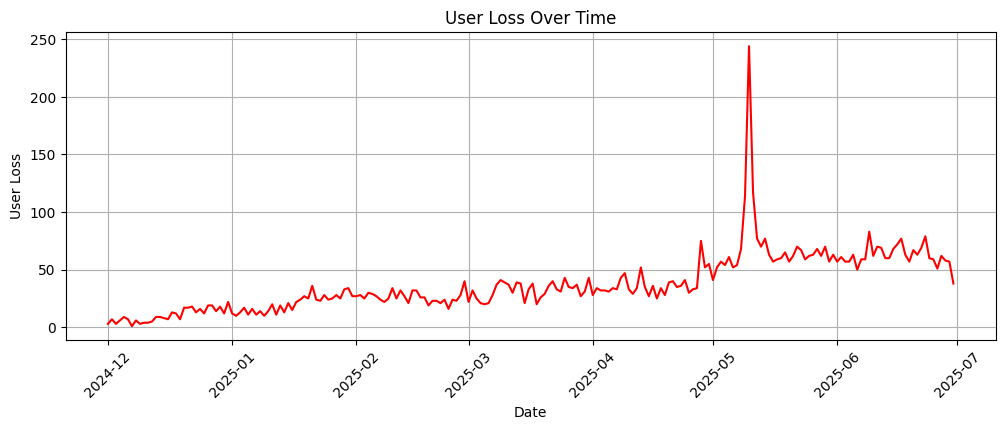

In [34]:
# Exact column name from your dataset
user_loss_col = "User loss (All users, All events, Per interval, Daily): All countries / regions"
# Convert column to numeric (replace errors with NaN)
merged_df[user_loss_col] = pd.to_numeric(merged_df[user_loss_col], errors="coerce")

# Plot User Loss over Date without markers
plt.figure(figsize=(12,4))
plt.plot(merged_df["Date"], merged_df[user_loss_col], color="red")
plt.title("User Loss Over Time")
plt.xlabel("Date")
plt.ylabel("User Loss")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


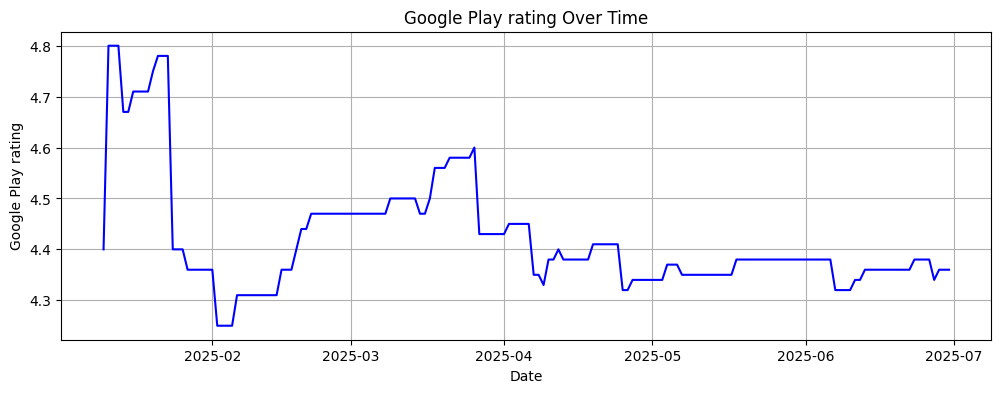

In [35]:
merged_df['Google Play rating (Per interval, Daily): All countries / regions'] = (
    pd.to_numeric(
        merged_df['Google Play rating (Per interval, Daily): All countries / regions'].replace('-', np.nan)
    )
)

# Plot after cleaning
plt.figure(figsize=(12,4))
plt.plot(
    merged_df['Date'],
    merged_df['Google Play rating (Per interval, Daily): All countries / regions'],
    color='blue'
)
plt.title("Google Play rating Over Time")
plt.xlabel("Date")
plt.ylabel("Google Play rating")
plt.grid(True)
plt.show()

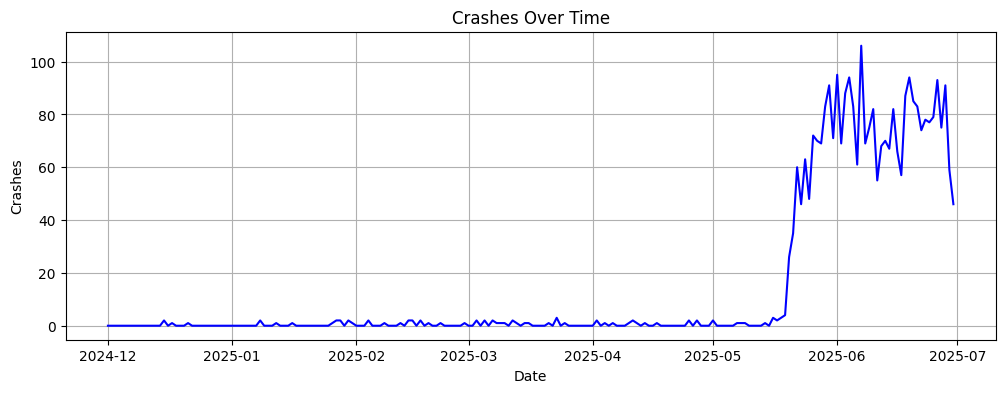

In [36]:
plt.figure(figsize=(12,4))
plt.plot(merged_df['Date'], merged_df['Crashes (Per interval, Daily): All Android versions'], color='blue')
plt.title("Crashes Over Time")
plt.xlabel("Date")
plt.ylabel("Crashes")
plt.grid(True)
plt.show()


In [37]:
labels = ['DAU', 'New Users', 'User Loss']

def to_num(val):
    return pd.to_numeric(val, errors='coerce')

# Prepare lists to gather the averages
countries = ['India', 'Pakistan', 'Bangladesh']
avg_data = {}

for country in countries:
    dau_avg = to_num(merged_df[f'Daily Active Users (DAU) (Unique users, Per interval, Daily): {country}']).mean()
    new_users_avg = to_num(merged_df[f'User acquisition (New users, All events, Per interval, Daily): {country}']).mean()
    user_loss_avg = to_num(merged_df[f'User loss (All users, All events, Per interval, Daily): {country}']).mean()
    avg_data[country] = [dau_avg, new_users_avg, user_loss_avg]

df_avg = pd.DataFrame(avg_data, index=labels)
print(df_avg)


                India   Pakistan  Bangladesh
DAU        529.871429  13.857143    9.328571
New Users   47.735849   1.971698    2.028302
User Loss   29.966981   1.415094    1.457547


In [38]:
labels = ['DAU', 'New Users', 'User Loss']

def to_num(val):
    return pd.to_numeric(val, errors='coerce')

countries = ['India', 'Pakistan', 'Bangladesh']
avg_data = {}

for country in countries:
    dau_avg = round(to_num(merged_df[f'Daily Active Users (DAU) (Unique users, Per interval, Daily): {country}']).mean())
    new_users_avg = round(to_num(merged_df[f'User acquisition (New users, All events, Per interval, Daily): {country}']).mean())
    user_loss_avg = round(to_num(merged_df[f'User loss (All users, All events, Per interval, Daily): {country}']).mean())
    avg_data[country] = [dau_avg, new_users_avg, user_loss_avg]

df_avg = pd.DataFrame(avg_data, index=labels)
print(df_avg)


           India  Pakistan  Bangladesh
DAU          530        14           9
New Users     48         2           2
User Loss     30         1           1


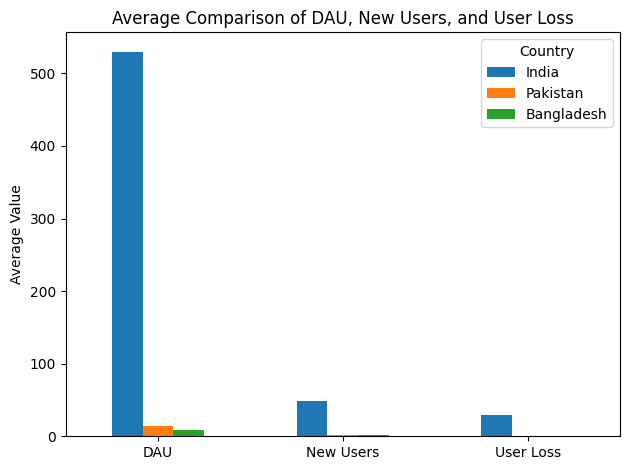

In [39]:
df_avg.plot(kind='bar')
plt.ylabel('Average Value')
plt.title('Average Comparison of DAU, New Users, and User Loss')
plt.xticks(rotation=0)
plt.legend(title='Country')
plt.tight_layout()
plt.show()


      Country  Avg Rating
0       India    4.505774
1    Pakistan    4.421512
2  Bangladesh    4.421512


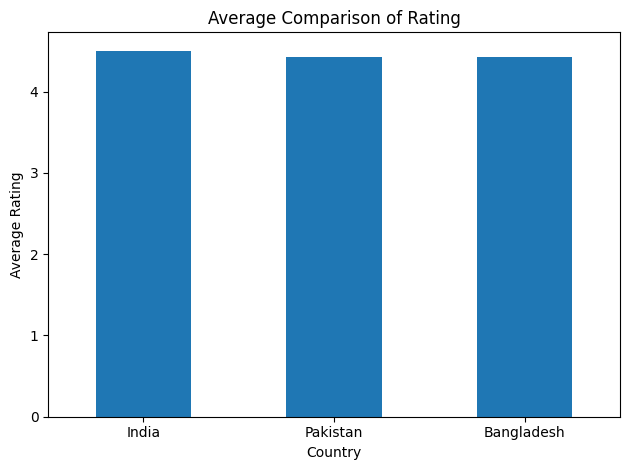

In [40]:
countries = ['India', 'Pakistan', 'Bangladesh']
country_rating_columns = {
    'India': 'Google Play rating (Per interval, Daily): India',
    'Pakistan': 'Google Play rating (Per interval, Daily): Pakistan',
    'Bangladesh': 'Google Play rating (Per interval, Daily): Bangladesh'
}

# Calculate average ratings
avg_ratings = {}
for country in countries:
    col_name = country_rating_columns[country]
    avg_rating = pd.to_numeric(merged_df[col_name], errors='coerce').mean()
    avg_ratings[country] = avg_rating

# Create DataFrame table
df_avg_rating = pd.DataFrame(list(avg_ratings.items()), columns=['Country', 'Avg Rating'])
print(df_avg_rating)

# Visualization
df_avg_rating.set_index('Country').plot(kind='bar', legend=False)
plt.ylabel('Average Rating')
plt.title('Average Comparison of Rating')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


               Android 15  Android 14  Android 13
Average Crash           5           5           2


<Figure size 1000x600 with 0 Axes>

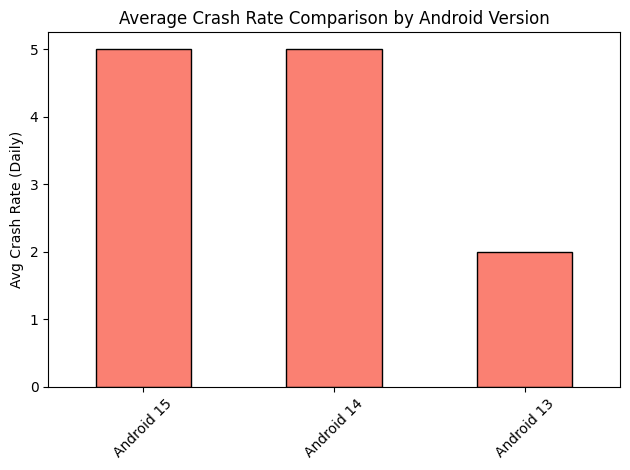

In [41]:
android_versions = ["Android 15", "Android 14", "Android 13"]

# Prepare to collect averages
avg_crash = []

for version in android_versions:
    col = f'Crashes (Per interval, Daily): {version}'
    avg = pd.to_numeric(merged_df[col], errors='coerce').mean()
    avg_crash.append(round(avg))

# Create table (DataFrame) for display
crash_avg_df = pd.DataFrame([avg_crash], columns=android_versions, index=['Average Crash'])

print(crash_avg_df)  # Table


plt.figure(figsize=(10, 6))  

# Create the bar plot (corrected syntax)
crash_avg_df.T.plot(kind='bar', color=['salmon'], legend=False, edgecolor='black')

plt.ylabel('Avg Crash Rate (Daily)')
plt.title('Average Crash Rate Comparison by Android Version')
plt.xticks(rotation=45)  
plt.tight_layout()  

plt.show()

                                                    Crashes (Per interval, Daily): All Android versions  \
Crashes (Per interval, Daily): All Android vers...                                           1.000000     
Google Play rating (Per interval, Daily): All c...                                          -0.277355     
Daily Active Users (DAU) (Unique users, Per int...                                           0.737578     
User loss (All users, All events, Per interval,...                                           0.482043     

                                                    Google Play rating (Per interval, Daily): All countries / regions  \
Crashes (Per interval, Daily): All Android vers...                                          -0.277355                   
Google Play rating (Per interval, Daily): All c...                                           1.000000                   
Daily Active Users (DAU) (Unique users, Per int...                                           0.017759

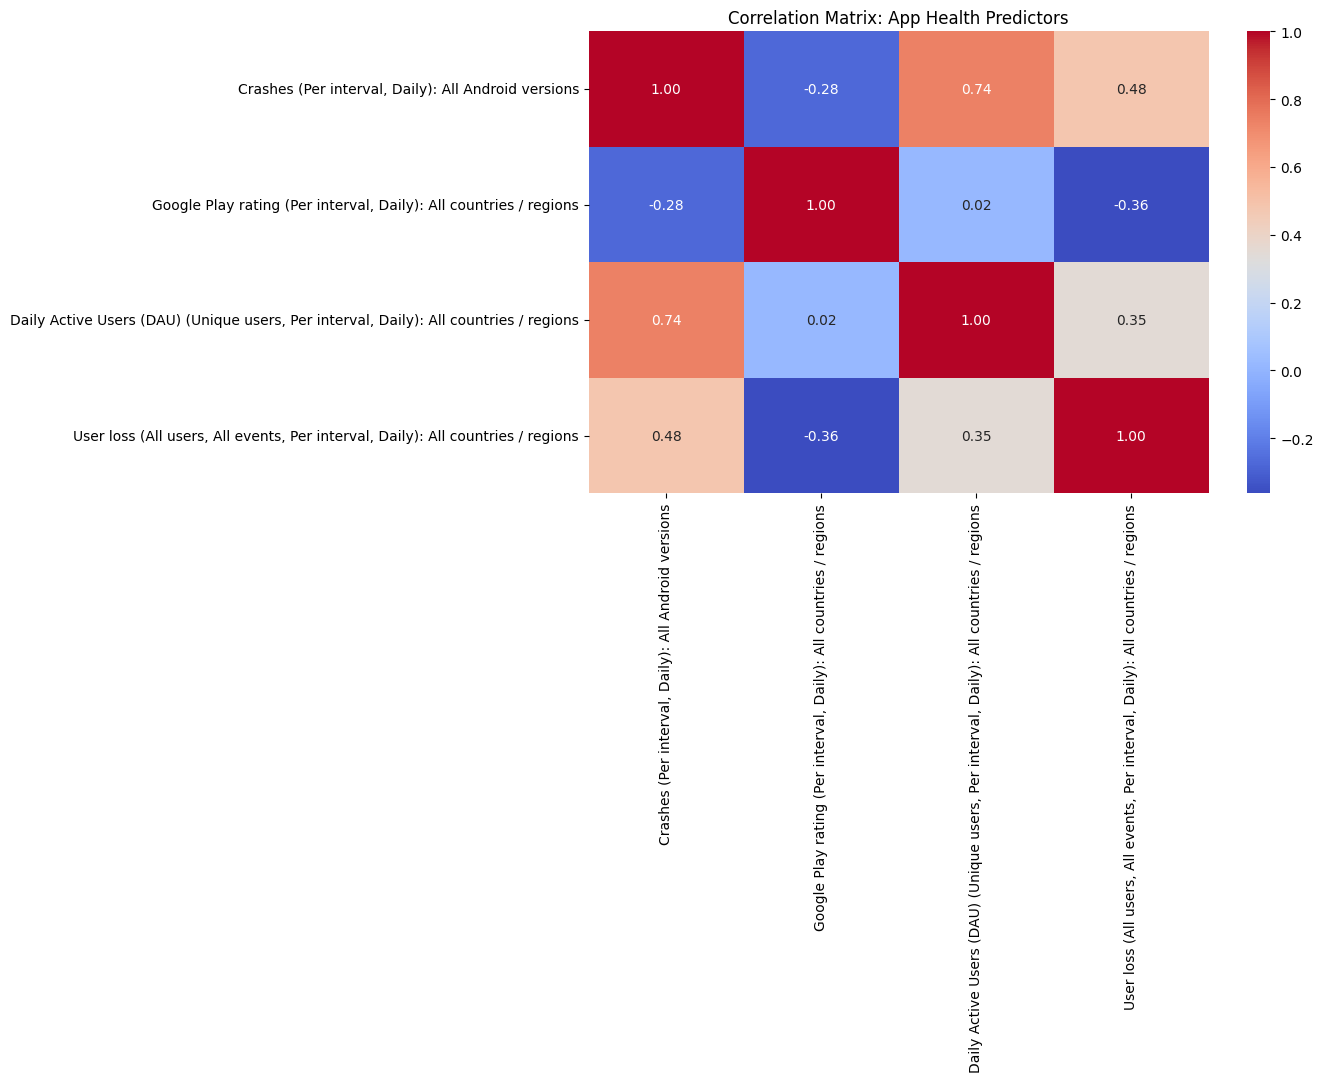

In [42]:
# Merge the DataFrames on the 'Date' column
df = crash_df[['Date', 'Crashes (Per interval, Daily): All Android versions']] \
    .merge(rating_df[['Date', 'Google Play rating (Per interval, Daily): All countries / regions']], on='Date', how='inner') \
    .merge(dau_df[['Date', 'Daily Active Users (DAU) (Unique users, Per interval, Daily): All countries / regions']], on='Date', how='inner') \
    .merge(all_user_lost_df[['Date', 'User loss (All users, All events, Per interval, Daily): All countries / regions']], on='Date', how='inner')

# Convert all columns except 'Date' to numeric (coerce errors to NaN)
for col in df.columns:
    if col != 'Date':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Correlation matrix
corr = df.drop(columns='Date').corr()
print(corr)

# Visualize
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: App Health Predictors')
plt.tight_layout()
plt.show()


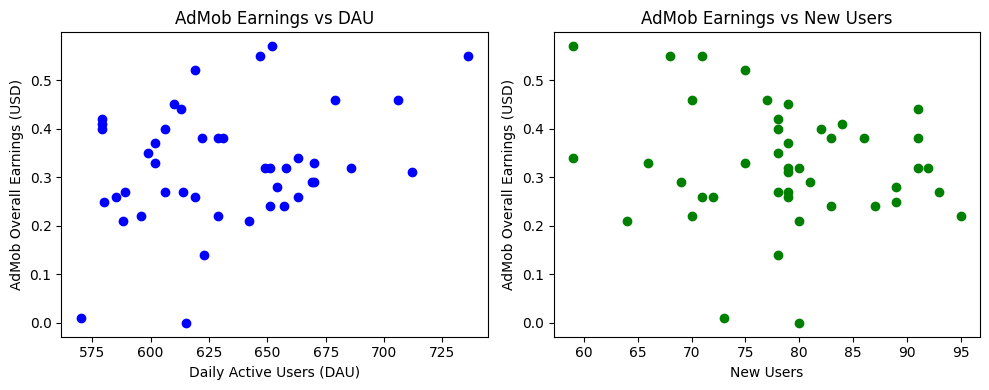

In [43]:
merged_df = admob_df[['Date', 'Overall earnings (USD)']] \
    .merge(dau_df[['Date', 'Daily Active Users (DAU) (Unique users, Per interval, Daily): All countries / regions']], on='Date', how='inner') \
    .merge(new_user_df[['Date', 'User acquisition (New users, All events, Per interval, Daily): All countries / regions']], on='Date', how='inner')

# Convert columns to numeric
merged_df['Overall earnings (USD)'] = pd.to_numeric(merged_df['Overall earnings (USD)'], errors='coerce')
merged_df['DAU'] = pd.to_numeric(merged_df['Daily Active Users (DAU) (Unique users, Per interval, Daily): All countries / regions'], errors='coerce')
merged_df['New Users'] = pd.to_numeric(merged_df['User acquisition (New users, All events, Per interval, Daily): All countries / regions'], errors='coerce')

# Plot 1: AdMob Earnings vs DAU
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(merged_df['DAU'], merged_df['Overall earnings (USD)'], color='b')
plt.xlabel('Daily Active Users (DAU)')
plt.ylabel('AdMob Overall Earnings (USD)')
plt.title('AdMob Earnings vs DAU')

# Plot 2: AdMob Earnings vs New Users
plt.subplot(1,2,2)
plt.scatter(merged_df['New Users'], merged_df['Overall earnings (USD)'], color='g')
plt.xlabel('New Users')
plt.ylabel('AdMob Overall Earnings (USD)')
plt.title('AdMob Earnings vs New Users')

plt.tight_layout()
plt.show()


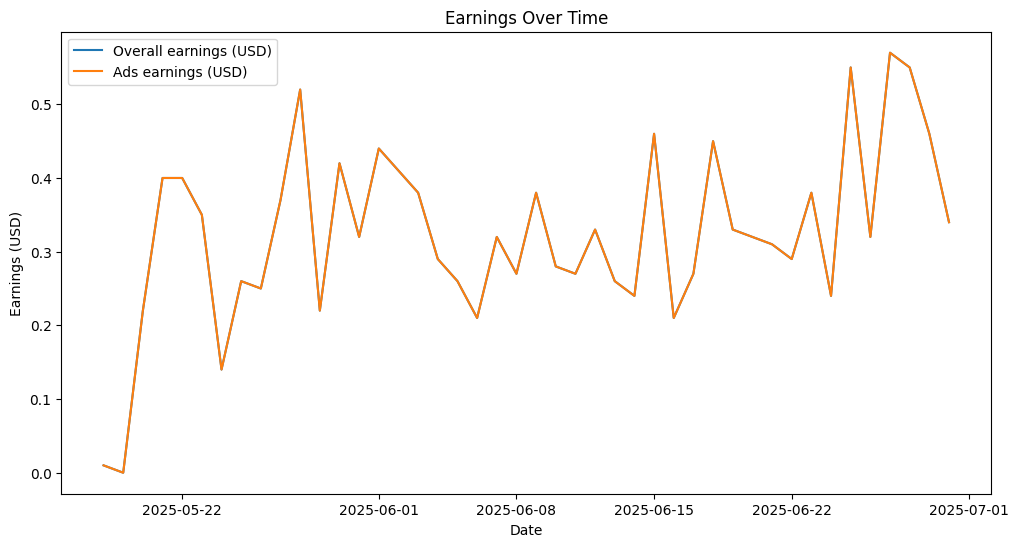

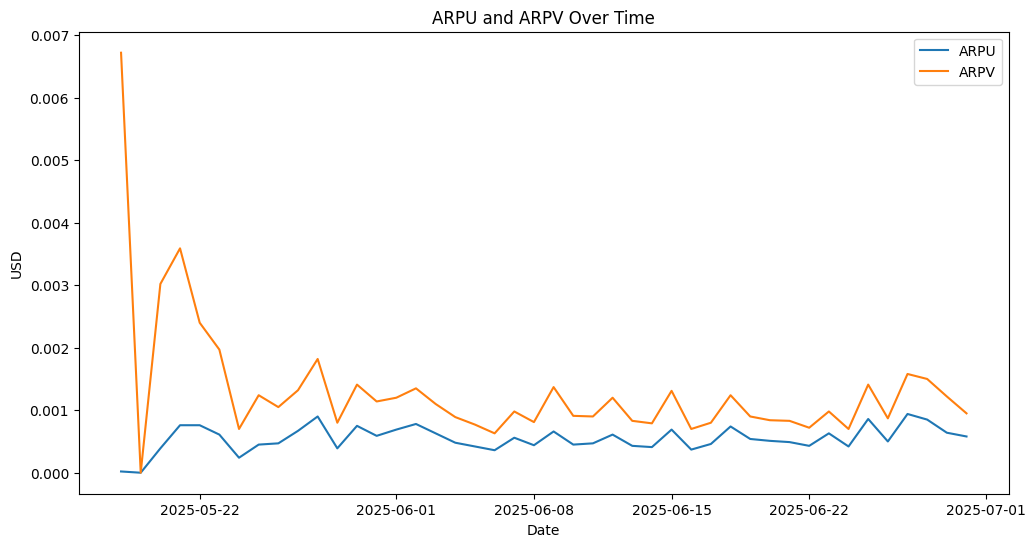

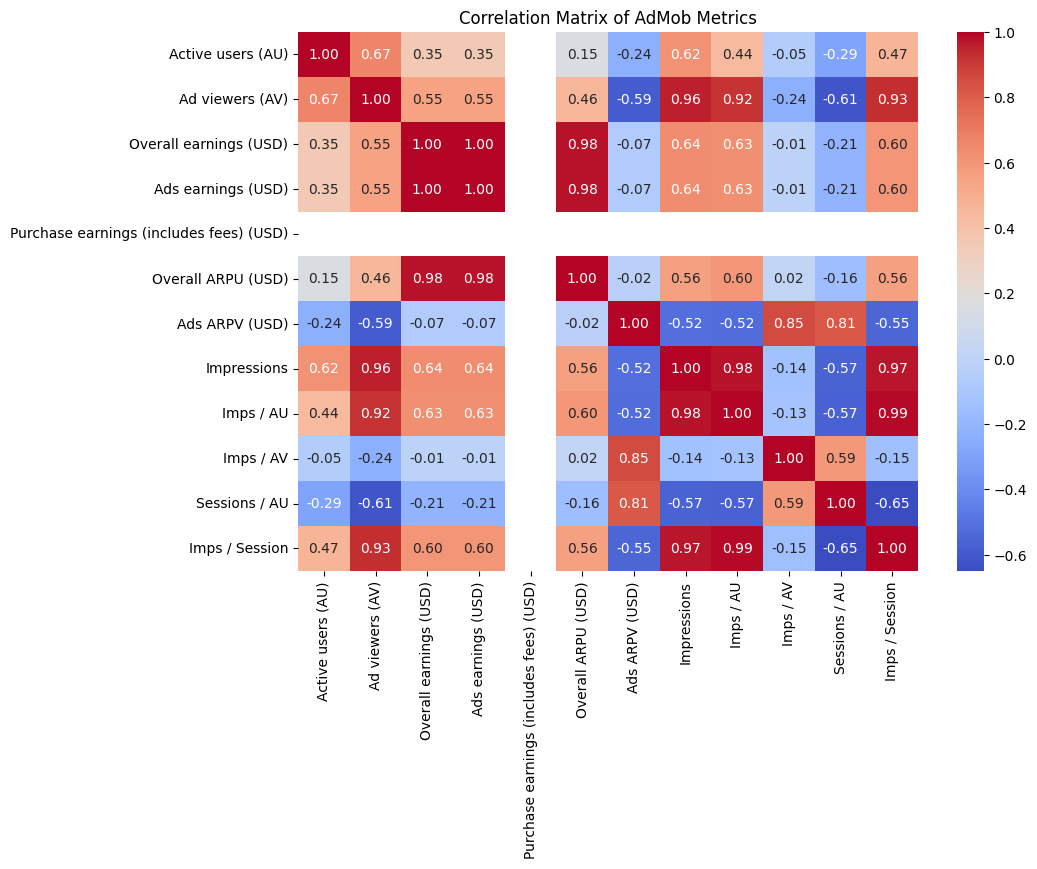

In [47]:
numeric_cols = [
    'Active users (AU)',
    'Ad viewers (AV)',
    'Overall earnings (USD)',
    'Ads earnings (USD)',
    'Purchase earnings (includes fees) (USD)',
    'Overall ARPU (USD)',
    'Ads ARPV (USD)',
    'Impressions',
    'Imps / AU', 'Imps / AV', 'Sessions / AU', 'Imps / Session'
]
for col in numeric_cols:
    admob_df[col] = pd.to_numeric(admob_df[col], errors='coerce')

# Parse date
admob_df['Date'] = pd.to_datetime(admob_df['Date'], errors='coerce')

# Drop rows with missing or invalid values in main columns
admob_clean = admob_df.dropna(subset=['Active users (AU)', 'Overall earnings (USD)'])




# Plot earnings over time
df = crash_df[['Date', 'Crashes (Per interval, Daily): All Android versions']] \
    .merge(rating_df[['Date', 'Google Play rating (Per interval, Daily): All countries / regions']], on='Date', how='inner') \
    .merge(dau_df[['Date', 'Daily Active Users (DAU) (Unique users, Per interval, Daily): All countries / regions']], on='Date', how='inner') \
    .merge(all_user_lost_df[['Date', 'User loss (All users, All events, Per interval, Daily): All countries / regions']], on='Date', how='inner')
plt.figure(figsize=(12,6))
plt.plot(admob_clean['Date'], admob_clean['Overall earnings (USD)'], label='Overall earnings (USD)')
plt.plot(admob_clean['Date'], admob_clean['Ads earnings (USD)'], label='Ads earnings (USD)')
plt.title('Earnings Over Time')
plt.xlabel('Date')
plt.ylabel('Earnings (USD)')
plt.legend()
plt.show()

# Revenue per user
plt.figure(figsize=(12,6))
plt.plot(admob_clean['Date'], admob_clean['Overall ARPU (USD)'], label='ARPU')
plt.plot(admob_clean['Date'], admob_clean['Ads ARPV (USD)'], label='ARPV')
plt.title('ARPU and ARPV Over Time')
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,7))
sns.heatmap(admob_clean[numeric_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of AdMob Metrics')
plt.show()


### **Data analysis and Visualization** ###

The project loaded and cleaned six app-related datasets (AdMob, user loss, crashes, DAU, new users, and ratings). Data spans Dec 2024–Jun 2025 (AdMob from May 2025). Key steps included handling nulls, formatting dates, and dropping irrelevant columns. The cleaned data provides a foundation to analyze engagement, monetization, crashes, and regional performance for actionable growth and revenue insights